
## **Inputs for running the Regional Ocean Modeling System (ROMS): Indian Ocean Regional Grid, Initial, Boundary File Preparation in Google Colab**

## *Steps to Access Google Colab and the Notebook File*

Step 1: Open the link:
 https://github.com/prasannakanti/Data_Grid/blob/main/Grid_Preparation.ipynb

Step 2: Click the three dots in the top-right corner of the window → click Download.
The file Grid_Preparation.ipynb will be saved in your Downloads folder.

Step 3: Open Google Colab: https://colab.research.google.com/

Step 4: In Google Colab, go to
File → Upload notebook → Upload → Browse
Locate Grid_Preparation.ipynb in your Downloads folder and upload it.

## **Step1** : Required python package roms-tools (ref: https://roms-tools.readthedocs.io/en/latest/)

In [1]:
pip install roms-tools[dask]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 89.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 94.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 102.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 66.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.3/72.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.1/881.1 kB 54.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.4/276.4 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 116.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 86.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 79.7

## Step 2: Download required files (Bathymetry file, Reanalysis Data)

In [2]:
!git clone https://github.com/prasannakanti/Data_Grid.git


Cloning into 'Data_Grid'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 12 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (12/12), 3.10 MiB | 8.52 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [3]:
# Change directory
%cd Data_Grid

/content/Data_Grid


In [4]:
!pwd

/content/Data_Grid


In [5]:
!ls

ERA5.nc      GLORY_Jan_1deg.nc	     IO_1deg.nc
ERA5_T2M.nc  Grid_Preparation.ipynb  SRTM15_V2.6_IO_1deg.nc



## **Grid Preparation**



In [6]:
from roms_tools import Grid
import xarray as xr
import matplotlib.pyplot as plt

## **Visualization of bathymetry file**

In [7]:
bathy = xr.open_dataset('/content/Data_Grid/SRTM15_V2.6_IO_1deg.nc').z

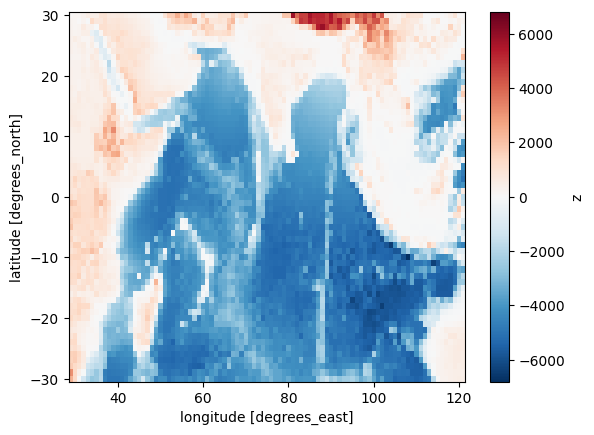

In [8]:
bathy.plot()

## **Grid Preparation**

In [9]:
grid = Grid(
    nx=91,              # ➤ Number of grid points in the x-direction (longitude)
    ny=61,              # ➤ Number of grid points in the y-direction (latitude)
    size_x=9100,        # ➤ Total horizontal domain size in the x-direction (in km)
    size_y=6100,        # ➤ Total horizontal domain size in the y-direction (in km)
    center_lon=75,      # ➤ Longitude of the domain center (e.g., 75°E for Indian Ocean)
    center_lat=0,       # ➤ Latitude of the domain center (e.g., equatorial region)
    rot=0,              # ➤ Grid rotation angle (0° means east–west oriented grid)
    theta_s=5,          # ➤ Surface stretching parameter for vertical sigma levels
    theta_b=0.7,        # ➤ Bottom stretching parameter for vertical sigma levels
    hc=300,             # ➤ Critical depth controlling sigma coordinate stretching
    topography_source={
        "name": "SRTM15",                                  # ➤ Bathymetry dataset name
        "path": "/content/Data_Grid/SRTM15_V2.6_IO_1deg.nc" # ➤ File path to SRTM15 topography data
    },
    N=50,               # ➤ Number of vertical layers (higher = finer vertical resolution)
    verbose=True,       # ➤ Print progress and diagnostic information during grid generation
)



## **Visualization and Diagnostics**
In this section, we visualize the prepared grid and datasets to ensure correctness.  
Common diagnostics include:
- Plotting bathymetry and land-sea masks.  
- Checking smoothness of topography.  
- Verifying boundaries and vertical levels.


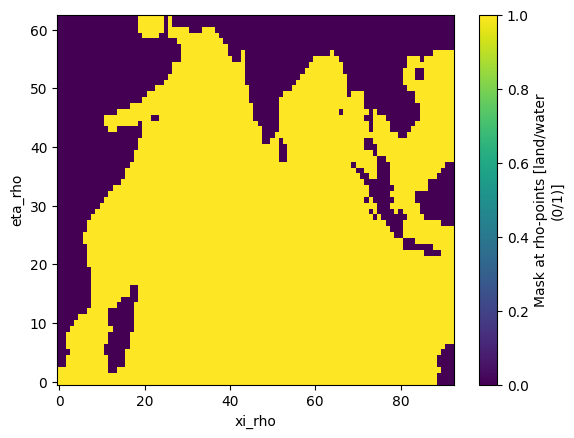

In [32]:
grid.ds.mask_rho.plot()

In [33]:
grid.ds.attrs

{'title': 'ROMS grid created by ROMS-Tools',
 'roms_tools_version': '3.1.2',
 'size_x': 9100,
 'size_y': 6100,
 'center_lon': 75,
 'center_lat': 0,
 'rot': 0,
 'straddle': 'False',
 'topography_source_name': 'SRTM15',
 'topography_source_path': '/content/Data_Grid/SRTM15_V2.6_IO_1deg.nc',
 'hmin': 5.0,
 'theta_s': np.float32(5.0),
 'theta_b': np.float32(0.7),
 'hc': np.float32(300.0)}

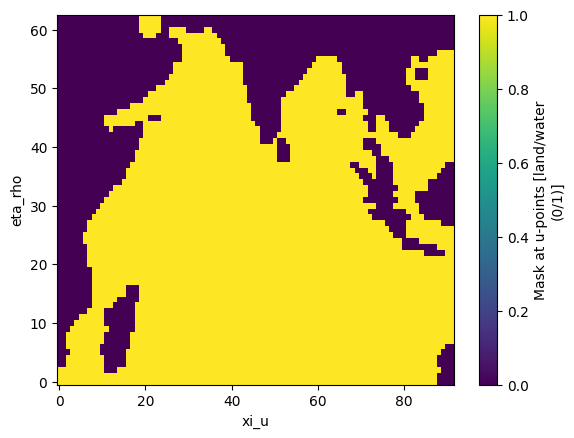

In [34]:
grid.ds.mask_u.plot()

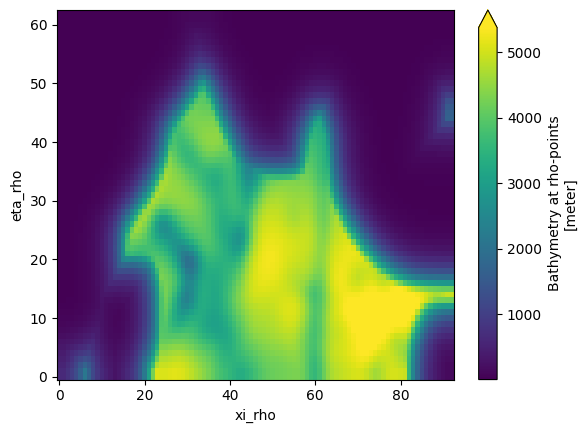

In [35]:
grid.ds.h.plot(robust=True)

Text(0.5, 1.0, 'Vertical stretching function at rho-points')

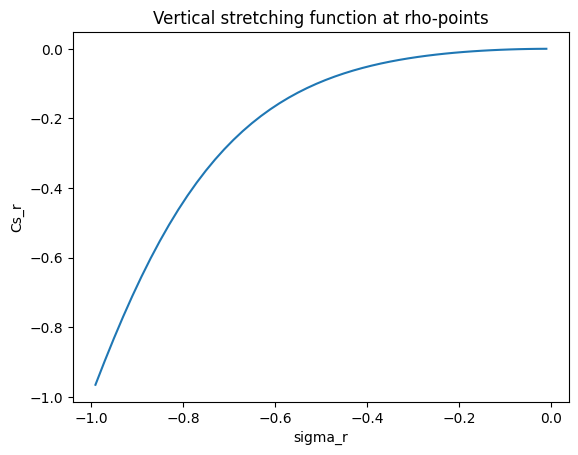

In [36]:
plt.plot(grid.ds.sigma_r, grid.ds.Cs_r)
plt.xlabel("sigma_r")
plt.ylabel("Cs_r")
plt.title("Vertical stretching function at rho-points")

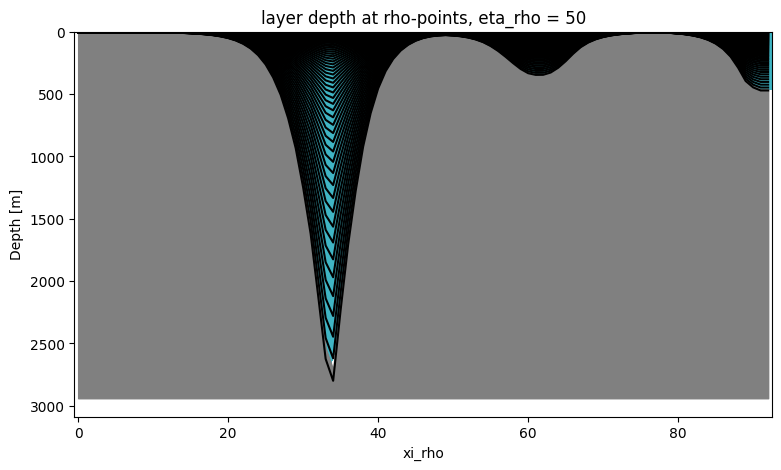

In [37]:
grid.plot_vertical_coordinate(eta=50)

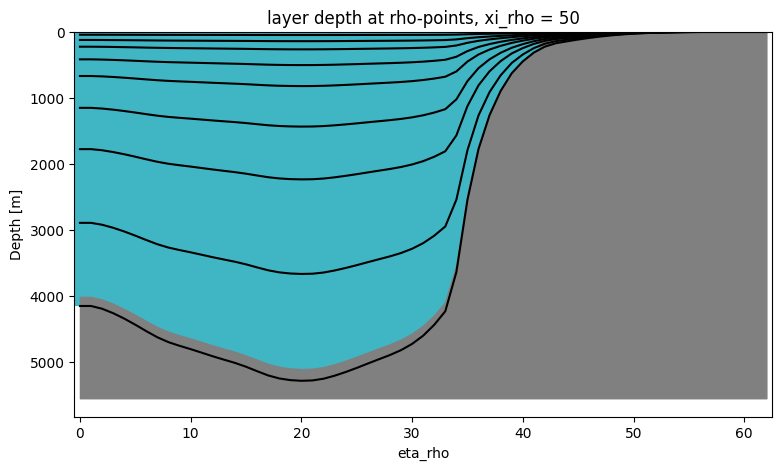

In [38]:
grid.plot_vertical_coordinate(xi=50, max_nr_layer_contours=10)

## **Save the Grid**

In [40]:
#grid.save('IO_1deg.nc')


## **Initial Condition Preparation**
This section prepares the initial condition (`ini`) file required by ROMS.  
It involves:
1. Loading GODAS or reanalysis datasets containing temperature, salinity, and velocity fields.
2. Interpolating these fields to the ROMS grid resolution.
3. Saving the result as `*_ini.nc`, which initializes the ocean state at model start time.


In [41]:
path = '/content/*/GLORY_Jan*nc'

In [42]:
from datetime import datetime
ini_time = datetime(1993, 1, 16, 12, 0, 0)

In [43]:
from roms_tools import InitialConditions,BoundaryForcing

In [44]:
initial_conditions = InitialConditions(
    grid=grid,
    ini_time=ini_time,
    source={"name": "GLORYS", "path": path},
    model_reference_date=datetime(1993, 1, 16), # this is the default
    use_dask=True,
)

In [45]:
initial_conditions.ds.ubar.compute()

<xarray.DataArray 'ubar' (ocean_time: 1, eta_rho: 63, xi_u: 92)> Size: 23kB
array([[[-1.8992350e-01, -1.7755479e-01, -1.2538803e-01, ...,
          2.3463715e-02,  5.2525373e-03, -5.6707505e-03],
        [-1.1936282e-01, -2.4741623e-01, -1.9867323e-01, ...,
         -4.1288102e-05, -8.5218539e-03, -1.0486236e-02],
        [-3.8646989e-02, -9.4194815e-02, -1.4988944e-01, ...,
         -7.1837497e-03, -1.2296660e-02, -1.3027825e-02],
        ...,
        [ 5.2717892e-03,  9.1952516e-04, -3.7418790e-02, ...,
         -7.7938281e-02, -8.0606349e-02, -8.5300095e-02],
        [-3.5965383e-02, -4.3736391e-02, -1.9285098e-02, ...,
         -7.9899326e-02, -8.3460227e-02, -8.8667482e-02],
        [ 1.5645267e-03,  1.9890111e-02,  1.6684636e-02, ...,
         -7.6951846e-02, -8.0326051e-02, -8.5094407e-02]]], dtype=float32)
Coordinates:
    abs_time    (ocean_time) datetime64[ns] 8B 1993-01-16T12:00:00
  * ocean_time  (ocean_time) float64 8B 4.32e+04
Dimensions without coordinates: eta_rho, xi_u
Attributes:
    long_name:  vertically integrated u-flux component
    units:      m/s

[########################################] | 100% Completed | 1.35 s


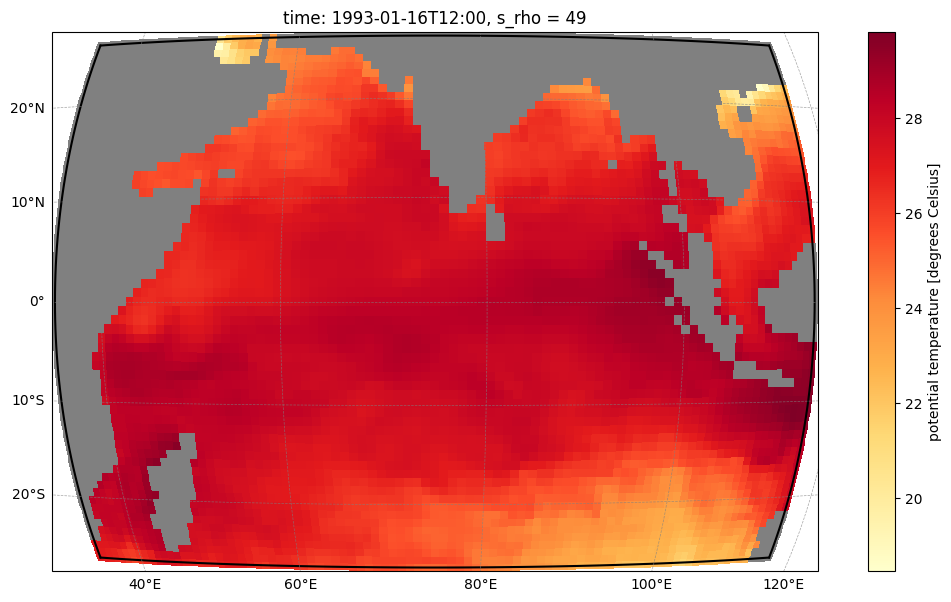

In [42]:
initial_conditions.plot("temp", s=-1)

In [ ]:
# initial_conditions.ds.to_netcdf('Initial.nc')


## **Boundary Condition Preparation**
This step defines the boundary conditions for the ROMS domain.  
The procedure includes:
1. Extracting lateral boundaries from global datasets.
2. Performing horizontal and vertical interpolation.
3. Writing the final boundary condition file `*_bry.nc` for ROMS input.


In [51]:
start_time = datetime(1993, 1, 16)
end_time = datetime(1993, 1, 16)

In [52]:
boundary_forcing = BoundaryForcing(
    grid=grid,
    start_time=start_time,
    end_time=end_time,
    boundaries={
        "south": True,
        "east": True,
        "north": False,  # northern boundary excluded
        "west": False,   # western boundary excluded
    },
    source={"name": "GLORYS", "path": path},
    type="physics",  # "physics" or "bgc"; default is "physics"
    model_reference_date=datetime(2000, 1, 1), # this is the default
    use_dask=True,
)


[########################################] | 100% Completed | 102.82 ms


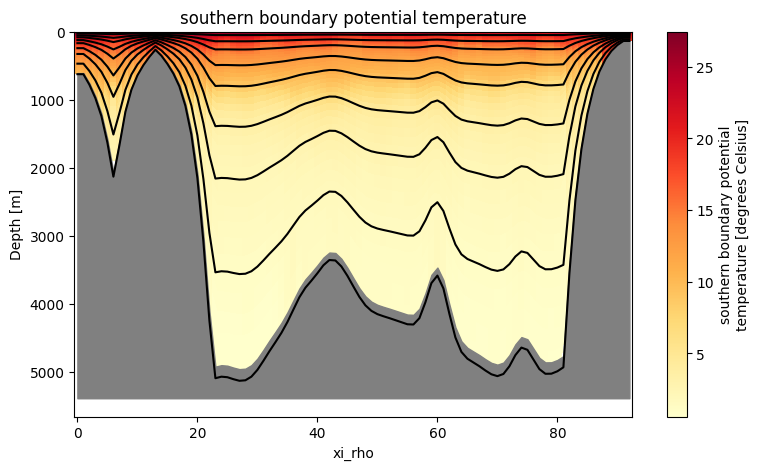

In [53]:
boundary_forcing.plot("temp_south", time=0, layer_contours=True)

[########################################] | 100% Completed | 102.92 ms


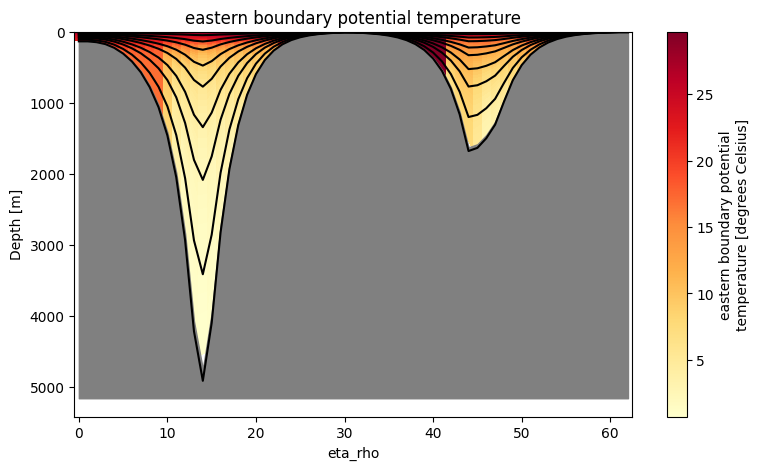

In [54]:
boundary_forcing.plot("temp_east", time=0, layer_contours=True)

## **Forcing File Preparation From ERA5** (Ref: https://roms-tools.readthedocs.io/en/latest/surface_forcing.html)


In [56]:
path = "ERA5_T*.nc"

In [57]:
from roms_tools import SurfaceForcing

In [58]:
start_time = datetime(2012, 1, 15)
end_time = datetime(2012, 12, 15)

In [59]:
surface_forcing_kwargs = {
    "grid": grid,
    "start_time": start_time,
    "end_time": end_time,
    "type": "physics",
    "model_reference_date": datetime(2000, 1, 1), # this is the default
}


In [60]:
%%time
surface_forcing_from_local_data = SurfaceForcing(
    **surface_forcing_kwargs,
    source={"name": "ERA5", "path": path},
    use_dask=True,
)

ValueError: Dataset does not contain all required variables. The following variables are missing: ['u10', 'v10', 'ssr', 'strd', 'd2m', 'tp', 'sst']

#**Exercise**
1. Download the required variables for 1year from "https://cds.climate.copernicus.eu/datasets/reanalysis-era5-single-levels-monthly-means?tab=download.

2. Upload the file here

3. Create the forcing by running the previous cell.

In [61]:
era5  = xr.open_dataset('ERA5.nc')

In [62]:
era5

<xarray.Dataset> Size: 3MB
Dimensions:    (time: 12, bnds: 2, lat: 61, lon: 91)
Coordinates:
  * lon        (lon) float32 364B 30.0 31.0 32.0 33.0 ... 118.0 119.0 120.0
  * lat        (lat) float32 244B -30.0 -29.0 -28.0 -27.0 ... 28.0 29.0 30.0
  * time       (time) datetime64[ns] 96B 1993-01-01 1993-02-01 ... 1993-12-01
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 192B ...
    strd       (time, lat, lon) float32 266kB ...
    Q2M        (time, lat, lon) float64 533kB ...
    tp         (time, lat, lon) float64 533kB ...
    msl        (time, lat, lon) float32 266kB ...
    ssrd       (time, lat, lon) float64 533kB ...
    t2m        (time, lat, lon) float64 533kB ...
    u10        (time, lat, lon) float32 266kB ...
    v10        (time, lat, lon) float64 533kB ...
Attributes:
    history:      Wed Jan 31 15:24:09 2024: ncatted -O -a coordinates,strd,o,...
    Conventions:  CF-1.6
    NCO:          4.7.1